<a href="https://colab.research.google.com/github/raulbenitez/Tirana_CV/blob/main/IMAGE%20PREPROCESSING/Basic_Image_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE PREPROCESSING: Basic operations

# Handling of digital images:


    

## Reading a grayscale image

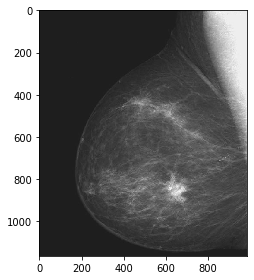

In [ ]:
import skimage as sk # load skimage libraries
from skimage.io import imread 
I = sk.io.imread('/content/image1.tif') # read image using imread function
sk.io.imshow(I) # visualize image using imshow function
sk.io.show() 

Check image size:

In [ ]:
I.shape # Size of image in pixels

(1164, 984)

Access to origin pixel (top-left, DARK REGION) 

In [ ]:
I[0,0] # Pixel value of first row, first column

38

Access to top-right region (LIGHT REGION)

In [ ]:
I[0,983] # Pixel value of first row, last column

238

Digital encoding of the pixel grayscale levels: 

In [ ]:
I.dtype

dtype('uint8')

'uint8' stands for *unsigned integer of 8 bits*, meaning that each pixel in the image is encoded with 8 bits representing an integer in the range [0,255]. In general, a n-bit grayscale image allows a range in levels from 0 to $2^n - 1$. 

## Represent pixels along a certain row: 

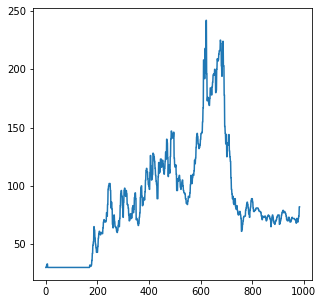

In [ ]:
Irow = I[850,:] # pixels along the row 850 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

## Read a RGB color image:

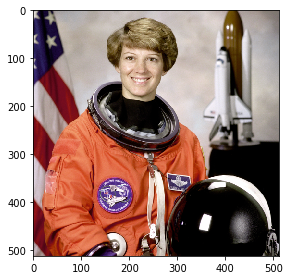

M = 512 columns, N = 512 rows, NC = 3 color channels


In [ ]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

Check image size:

In [ ]:
IC.shape

(512, 512, 3)

## Convert color to grayscale:

$IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$


In [ ]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

In [ ]:
IG_manual = (0.2125*IC[:,:,0]+0.7154*IC[:,:,1]+0.0721*IC[:,:,2])/255

In [ ]:
IG[0,0]

0.5834349019607843

In [ ]:
IG_manual[0,0]

0.5834349019607843

In [ ]:
import numpy as np
np.sum(IG-IG_manual)

-1.5090290128583206e-12

## Using colormaps

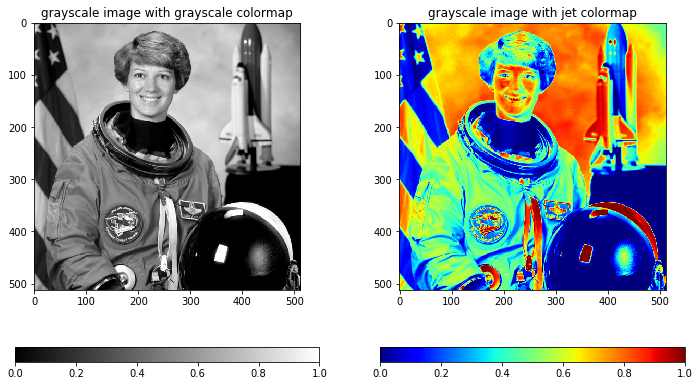

In [ ]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar 
im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar 
sk.io.show() 

## Convert image to different formats:
Convert an image to unsigned byte format, with values in [0, 255].


In [ ]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

In [ ]:
np.max(IGB)

255

## Image histogram:

Distribution of pixel values, how many pixels are there in the image for each grayscale level? 


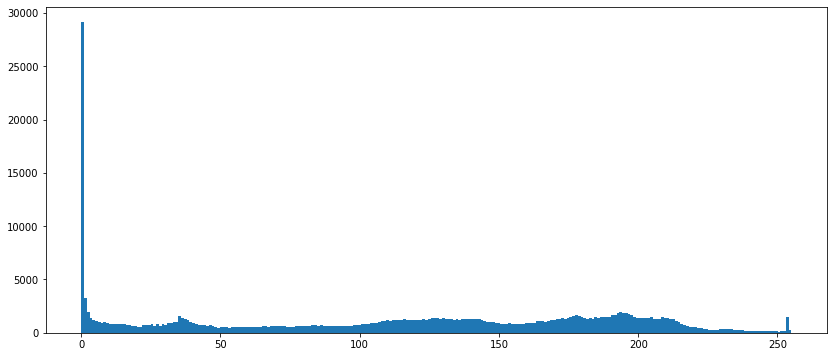

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

Total number of pixels in the image

In [ ]:
IGB.shape[0]*IGB.shape[1]

262144

Number of pixels with value zero

In [ ]:
v[v==0].shape[0]

29129

Probability of grayscale level zero:

In [ ]:
p0 = v[v==0].shape[0]/(IGB.shape[0]*IGB.shape[1])
print(p0)

0.11111831665039062


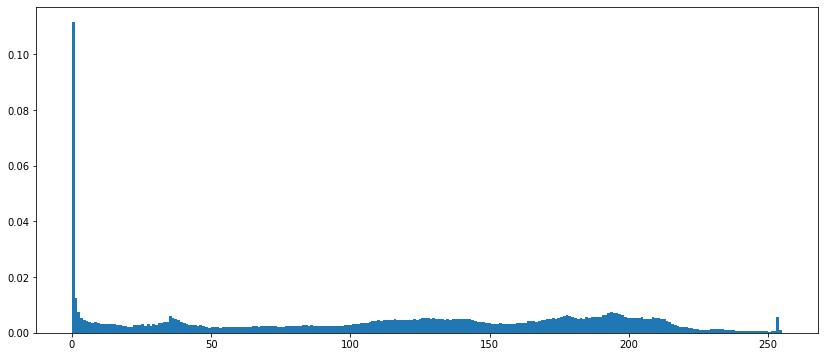

In [ ]:
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)
plt.show()

There are too many zeros in the image, take them out in order to properly visualize the distribution: 

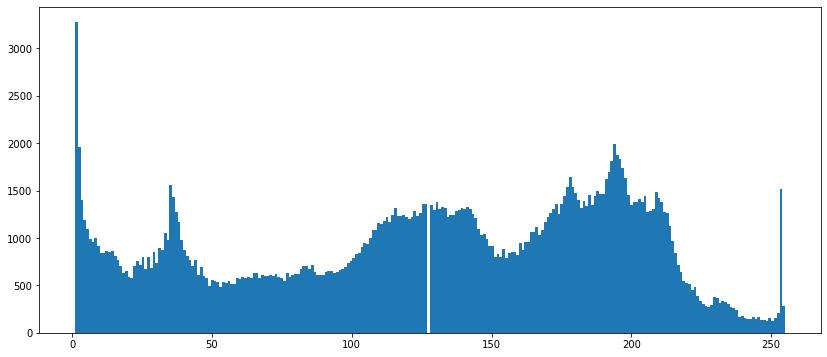

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

 Represent the normalized histogram corresponding to the probability distribution function of the graylevel pixel occurence

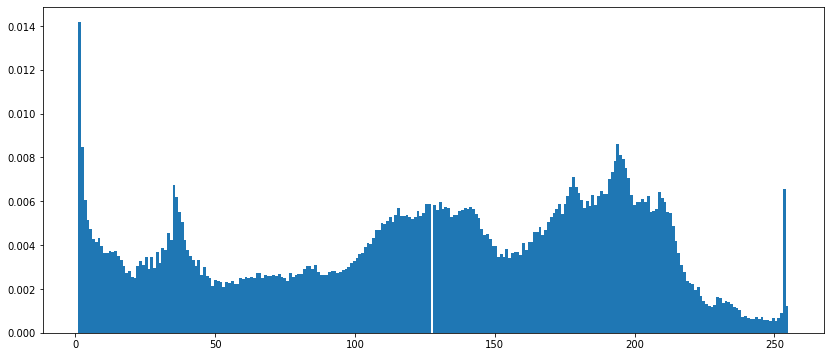

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)
plt.show()

Cummulative probability distribution function (cdf) of grayscale levels: Area over the curve of the normalized histogram

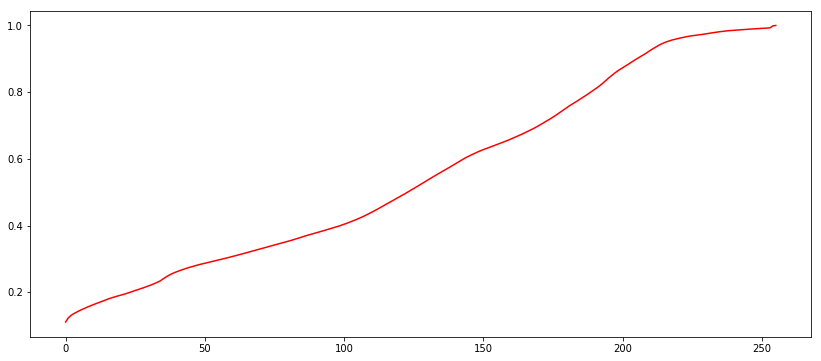

In [ ]:
 from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins,img_cdf,'r')
plt.show()

Compute the median of the image (grayscale level at which the cdf is 0.5): 

In [ ]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)
np.median(v)

123.0

# Basic mathematical operations


    - pixel-wise distances
    - set/logical operations 
    - affine transformations
    - arithmetic operations 
    - intensity transforms (contrast enhancement, log and gamma)
    - pixel statistics, image histogram

## Pixel-wise distances: 

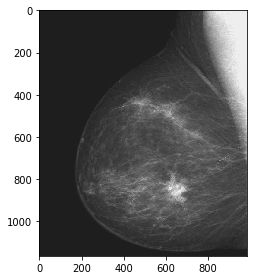

In [ ]:
import skimage as sk # load skimage libraries

%matplotlib inline

I = sk.io.imread('image1.tif') # read image using imread function
sk.io.imshow(I) # visualize image using imshow function
sk.io.show() 
plt.show()

### Euclidean distance between two pixels:

In [1]:
from scipy.spatial.distance import pdist 


X1 = np.array([10, 10]) # position of pixel 1  (row, col)
X2 = np.array([20, 20]) # position of pixel 2  (row, col)
X = [X1,X2]
Y = pdist(X, 'euclidean')
print('Euclidean distance={}'.format(*Y))

# which is equivalent to:
Y1 = np.sqrt(np.power(X1-X2,2).sum())

print('Y = {} and Y1 = {}'.format(*Y,Y1))

NameError: ignored

In [ ]:
## Cityblock distance: 
Y = pdist(X, 'cityblock')
print('Cityblock distance={}'.format(*Y))

# Chessboard distance (Chevichev): 
Y = pdist(X, 'chebyshev')
print('Chessboard distance={}'.format(*Y))


### The euclidean distance transform 

Assigns values of the euclidean distance:

$y_i = \sqrt{\sum_{i=1}^{d} (x_i - b_i)^2}$ 


where $b_i$ is the background point (value 0) with the smallest Euclidean distance to input points $x_i$, and d is the number of dimensions.

In [ ]:
a = np.array(([0,1,1,1,1],
                  [0,0,1,1,1],
                  [0,1,1,1,1],
                  [0,1,1,1,0],
                  [0,1,1,0,0]))

from scipy import ndimage
edt = ndimage.distance_transform_edt(a)
edt

## Set and logical operations

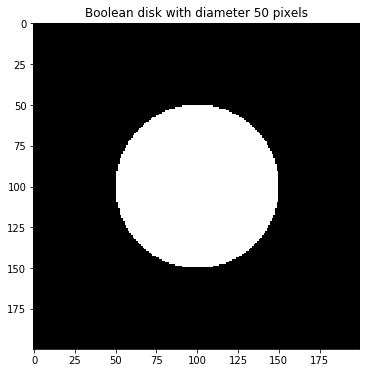

In [ ]:
nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < (disk_diameter)**2)

fig = plt.figure(figsize=(6,6))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('Boolean disk with diameter {} pixels'.format(disk_diameter))
plt.show()



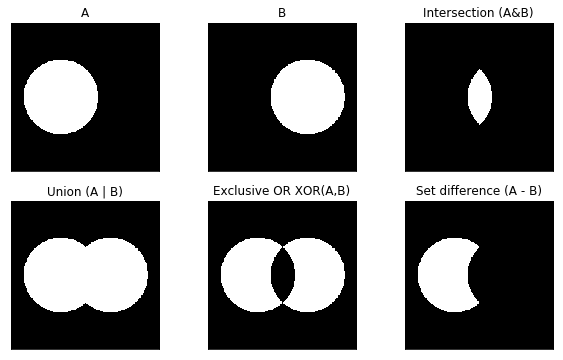

In [ ]:
nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND): 
I_and = outer_disk_mask1 & outer_disk_mask2

# Union (logical OR): 
I_or = outer_disk_mask1 | outer_disk_mask2

# Exclusive OR xor(A,B): Pixels that are in A but not in B
I_diff1 = np.logical_xor(outer_disk_mask1, outer_disk_mask2)

# Difference (A-B)=A&(not(B)): Pixels that are in A but not in B
I_diff2 = outer_disk_mask1 & np.logical_not(outer_disk_mask2)

fig = plt.figure(figsize=(10, 6))
plt.subplot(231),plt.imshow(outer_disk_mask1, cmap = 'gray')
plt.title('A'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(outer_disk_mask2, cmap = 'gray')
plt.title('B'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(I_and, cmap = 'gray')
plt.title('Intersection (A&B)'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(I_or, cmap = 'gray')
plt.title('Union (A | B)'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(I_diff1, cmap = 'gray')
plt.title('Exclusive OR XOR(A,B)'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(I_diff2, cmap = 'gray')
plt.title('Set difference (A - B)'), plt.xticks([]), plt.yticks([])
plt.show()

## Morphological Erosion and Dilation

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND): 
I_and = outer_disk_mask1 & outer_disk_mask2

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(7)
eroded = erosion(I_and, selem)
dilated = dilation(I_and, selem)
eroded_dilated = dilation(eroded, selem)


fig = plt.figure(figsize=(16, 12))
plt.subplot(221),plt.imshow(I_and, cmap = 'gray')
plt.subplot(222),plt.imshow(eroded, cmap = 'gray')
plt.subplot(223),plt.imshow(dilated, cmap = 'gray')
plt.subplot(224),plt.imshow(eroded_dilated, cmap = 'gray')


plt.show()


## Arithmetic operations 

In [ ]:
I.dtype

dtype('uint8')

In [ ]:
I.max()

255

Convertion between types:

In [ ]:
from skimage import img_as_int,img_as_float

Iint = img_as_int(I)
Ifloat = img_as_float(I)

print('uint8 range = {} - {}'.format(I.min(),I.max()))
print('Int range = {} - {}'.format(Iint.min(),Iint.max()))
print('Float range = {} - {}'.format(Ifloat.min(),Ifloat.max()))



uint8 range = 21 - 255
Int range = 2698 - 32767
Float range = 0.08235294117647059 - 1.0


Image overflow when adding to uint8 images:

In [ ]:
Isum = I + I


What happens is known as overflow: The result is 238+238=476 but encoded as a uint8 results in 476-256 = 220

In [ ]:
print('the values to sum are {} and {}, but the result is = {} '.format(I[0,I.shape[1]-1],I[0,I.shape[1]-1],Isum[0,Isum.shape[1]-1]))


the values to sum are 238 and 238, but the result is = 220 


## Intensity transformations & Contrast Enhancement:

### Gamma correction:  

${\displaystyle V_{\text{out}}=A{V_{\text{in}}^{\gamma }}}$, where the non-negative real input value ${\displaystyle V_{\text{in}}}$ is raised to the power ${\displaystyle \gamma }$ and multiplied by the constant A, to get the output value ${\displaystyle V_{\text{out}}}$. In the common case of A = 1, inputs and outputs are typically in the range 0–1.

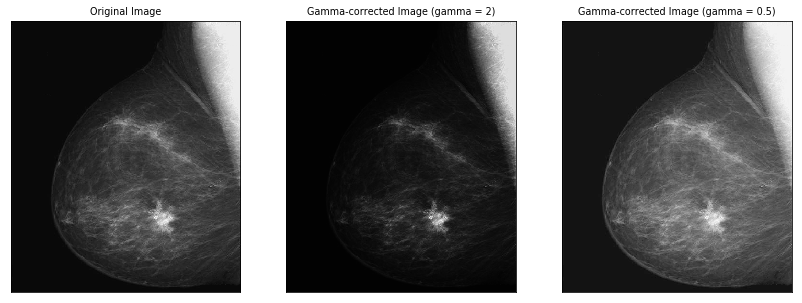

In [ ]:
from skimage import data, exposure, img_as_float
I_gamma_corrected_2 = exposure.adjust_gamma(I, 2)
I_gamma_corrected_05 = exposure.adjust_gamma(I, 0.5)

fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(I_gamma_corrected_2, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 2)'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(I_gamma_corrected_05, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 0.5)'), plt.xticks([]), plt.yticks([])
plt.show()



Compare the cummulative distribution of pixel intensities:

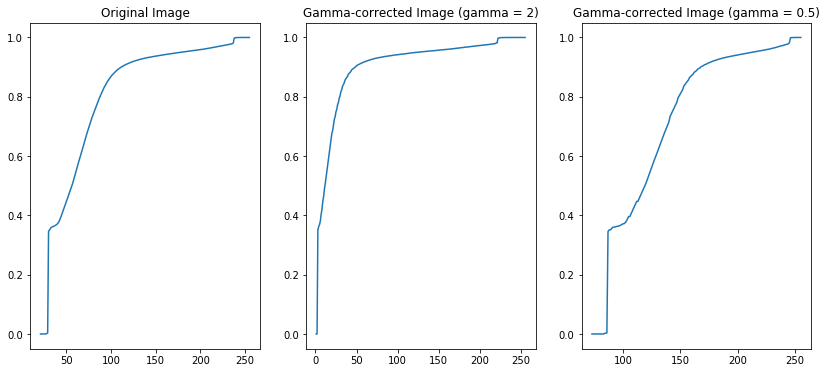

In [ ]:
 from skimage import exposure

I_cdf, bins = exposure.cumulative_distribution(I)
I1_cdf, bins1 = exposure.cumulative_distribution(I_gamma_corrected_2)
I2_cdf, bins2 = exposure.cumulative_distribution(I_gamma_corrected_05)

    
fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.plot(bins, I_cdf)
plt.title('Original Image')
plt.subplot(132),plt.plot(bins1, I1_cdf)
plt.title('Gamma-corrected Image (gamma = 2)')
plt.subplot(133),plt.plot(bins2, I2_cdf)
plt.title('Gamma-corrected Image (gamma = 0.5)')
plt.show()

### Logarithmic transformation: 

This function transforms the input image pixelwise according to the equation $O = gain*log(1 + I)$ after scaling each pixel to the range 0 to 1. For inverse logarithmic correction, the equation is $O = gain*(2**I - 1)$.

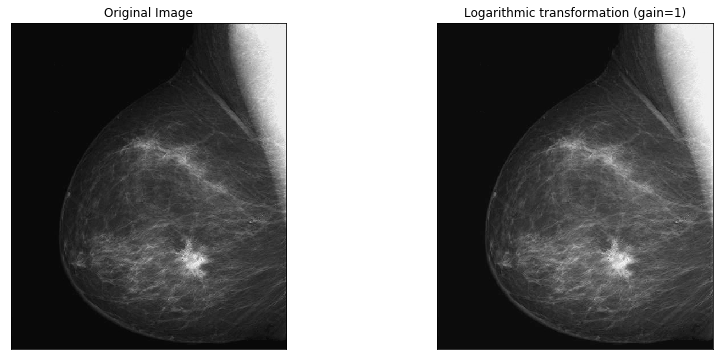

In [ ]:
I_logarithmic_corrected = exposure.adjust_log(I, 1)
fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_logarithmic_corrected, cmap = 'gray')
plt.title('Logarithmic transformation (gain=1)'), plt.xticks([]), plt.yticks([])
plt.show()

### Compare Gamma correction and logarithmic transformation: 

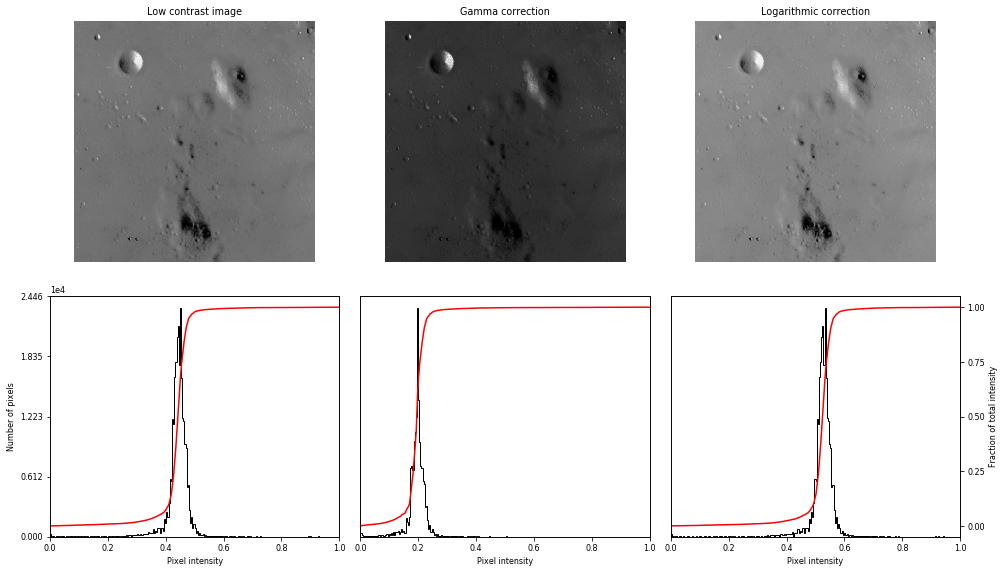

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(14, 8))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## Pixel statistics and image histograms:

Count histogram

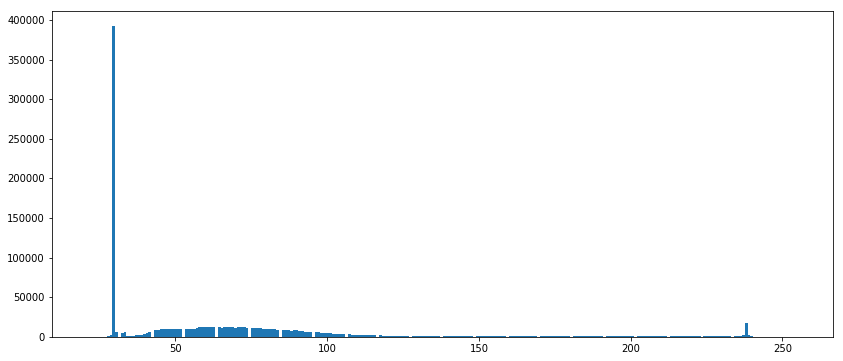

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = I.reshape(I.shape[0]*I.shape[1],1)
# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

Count histogram: 

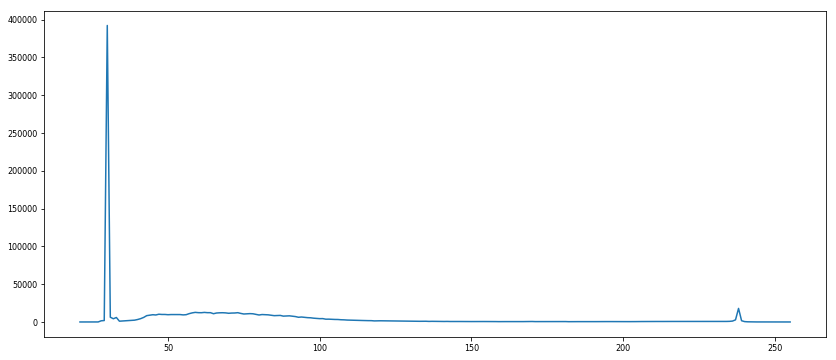

In [ ]:
from skimage import exposure
counts,bins = exposure.histogram(I, nbins=255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, counts)
plt.show()

Normalized histogram (probability density function of pixel intensity levels):

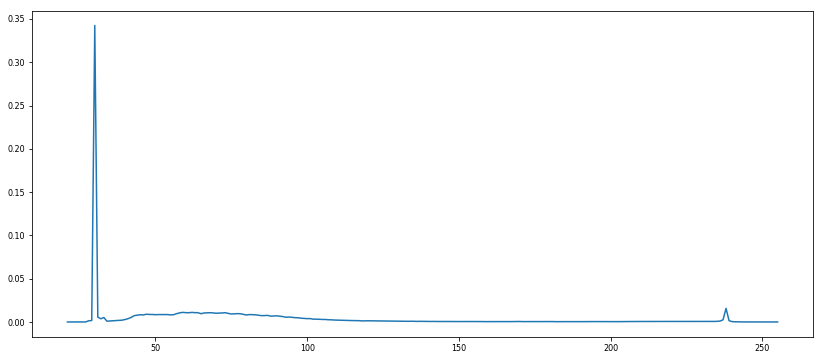

In [ ]:
from skimage import exposure
counts,bins = exposure.histogram(I, nbins=255)
p = counts/(I.shape[0]*I.shape[1])
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, p)
plt.show()

check that the area over the pdf is 1 (normalized):

In [ ]:
p.sum()

1.0

### Global mean, median and standard deviation of an image:

In [ ]:
print('Global mean of the image is = {}'.format(v.mean()))
print('Global std of the image is = {}'.format(v.std()))
print('Global median of the image is = {}'.format(np.median(v)))


Global mean of the image is = 66.63115954935323
Global std of the image is = 46.32668610854266
Global median of the image is = 57.0
